In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import transforms, datasets

import helper

import fc_model

In [3]:
#Define a transform to normalize the data

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])

#Training Data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#Test Data

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

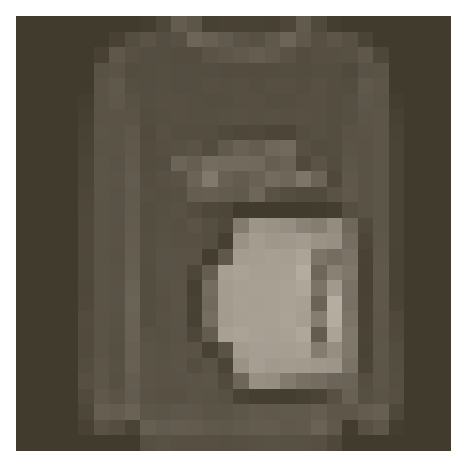

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

## Train a network

In [5]:
#Create network , define criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [6]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.673..  Test Loss: 0.898..  Test Accuracy: 0.671
Epoch: 1/2..  Training Loss: 1.007..  Test Loss: 0.722..  Test Accuracy: 0.726
Epoch: 1/2..  Training Loss: 0.884..  Test Loss: 0.690..  Test Accuracy: 0.724
Epoch: 1/2..  Training Loss: 0.749..  Test Loss: 0.621..  Test Accuracy: 0.761
Epoch: 1/2..  Training Loss: 0.751..  Test Loss: 0.626..  Test Accuracy: 0.769
Epoch: 1/2..  Training Loss: 0.724..  Test Loss: 0.574..  Test Accuracy: 0.785
Epoch: 1/2..  Training Loss: 0.663..  Test Loss: 0.568..  Test Accuracy: 0.787
Epoch: 1/2..  Training Loss: 0.662..  Test Loss: 0.549..  Test Accuracy: 0.794
Epoch: 1/2..  Training Loss: 0.668..  Test Loss: 0.542..  Test Accuracy: 0.799
Epoch: 1/2..  Training Loss: 0.642..  Test Loss: 0.561..  Test Accuracy: 0.790
Epoch: 1/2..  Training Loss: 0.644..  Test Loss: 0.517..  Test Accuracy: 0.806
Epoch: 1/2..  Training Loss: 0.608..  Test Loss: 0.522..  Test Accuracy: 0.812
Epoch: 1/2..  Training Loss: 0.601..  Test Loss: 0.5

## Saving our models

In [7]:
print("Our Model : \n\n", model, '\n')
print("The state dicts keys: \n\n", model.state_dict().keys())

Our Model : 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dicts keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [8]:
torch.save(model.state_dict(), 'checkpoint.pth')

## Load the model

In [9]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


And to load the model directly into network

In [10]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [11]:
checkpoint = {'input_size': 784, 
             'output_size': 10,
             'hidden_layers': [each.out_features for each in model.hidden_layers],
             'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

Now the checkpoint has all the necessary information to rebuild the trained model. You can easily make that a function if you want. Similarly, we can write a function to load checkpoints. 

In [12]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                            checkpoint['output_size'],
                            checkpoint['hidden_layers'])
    
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [13]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
